

# Исследовательский анализ рынка общественного питания Москвы


### Цели и задачи проекта


**Цель проекта:** Провести исследовательский анализ данных рынка общественного питания Москвы.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
   - провести общий анализ данных;
   - более подробно изучить сегмент пиццерий на рынке.
4. Сформулировать выводы по проведённому анализу.

### Описание данных


Данные представлены двумя файлами о заведениях общественного питания и ценах в них:

**Файл `/datasets/rest_info.csv`** содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

**`Файл /datasets/rest_price.csv`** содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
  - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта


1. Предварительное знакомство с данными
2. Предобработка данных
3. Исследовательский анализ данных
4. Детальное исследование пиццерий
5. Итоговый вывод и рекомендации
---

## 1. Загрузка данных и знакомство с ними


Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `r_info` и `r_price`.

In [4]:
!pip install phik

In [5]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [6]:
# Выгружаем данные датасетов
r_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
r_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')                 

In [7]:
# Выводим информацию и первые строки датасета r_info
display(r_info.info())
r_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


None

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [8]:
# Выводим информацию и первые строки датасета r_price
display(r_price.info())
r_price.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


None

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод



**Датасет `r_info`** состоит из 9 столбцов и 8 406 строк.

На первый взгляд данные соответствуют своему описанию. Указанные типы данных (`float64`, `int64`, `object`) приемлемы для соответсвующих значений столбцов. Однако можно отметить, что столбцев `seats` в дальнейшем можно перевести к типу `int`, так как по своей сущности данный показатель - целочисленный.

В 2 столбцах из 8 содержатся пропуски: столбцы `hours` и `seats`.

**Датасет `r_price`** состоит из 5 столбцов и 4 058 строк.

На первый взгляд данные соответствуют своему описанию. Название столбцов указаны в удобном для анализе виде `snake_case`. Указанные типы данных (`float64`, `object`) приемлемы для соответсвующих значений столбцов.

В 4 столбцах из 5 содержатся пропуски: столбцы `price`, `avg_bill`, `middle_avg_bill`, `middle_coffe_cup`.

Предварительное знакомство показывает, что данные соответствуют своему описанию. Датасет `r_info` содержит небольшое количество пропусков, однако в 4 из 5 столбцов датасета `r_price` содержатся пропуски, что негативно сказывается на качестве данных. Стоит также отметить, что размер датасета `r_price`практически в 2 раза меньше размера датасета `r_info`.

### Подготовка единого датафрейма



Для дальнейшего анализа соеденим данные в датасет **`df`**, используя тип присоединения `left` для того, чтобы минимизировать потерю данных:

In [9]:
df = r_info.merge(r_price, on = 'id', how = 'left')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


None

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


## 2. Предобработка данных


In [10]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Как говорилось ранее типы данных соответствуют указанным в них данным, для удобства можно перевести переменную `seats` из `float64` в `int`, однако переменная хранит в себе пропуски, поэтому для перевода сначала потребуется преобразовать данные пропуски.

In [11]:
# Выведем пропуски в абсолютных значениях
df.isna().sum().sort_values(ascending = False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [12]:
# Выведем пропуски в абсолютных значениях
df.isna().sum().sort_values(ascending = False) / df.shape[0]

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

In [13]:
display(df[df['hours'].isna()].head(10))

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN
123,e14d752227704822964731977a47d198,Кафе,кафе,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,4.3,0,50.0,NaN,NaN,NaN,NaN
126,77da9e57030c4ebf8c64968a4be78f71,Кулинария,кафе,"Москва, Череповецкая улица, 17",Северо-Восточный административный округ,NaN,3.9,1,NaN,NaN,NaN,NaN,NaN
138,fdfd314974d74b94980756c5ac2ce4a3,Хинкальная,быстрое питание,"Москва, Шенкурский проезд, 14",Северо-Восточный административный округ,NaN,4.1,1,50.0,NaN,NaN,NaN,NaN
217,f38e42e7d24e44b19ab3efd359c0e9f2,16 Июня,кафе,"Москва, бульвар Академика Ландау, 3",Северо-Восточный административный округ,NaN,1.4,0,NaN,NaN,NaN,NaN,NaN
274,cc4840626fc84b2daac8496282dc7e2c,Чайхана,кафе,"Москва, Широкая улица, 12",Северо-Восточный административный округ,NaN,3.0,1,50.0,NaN,NaN,NaN,NaN


Причиной пропусков в столбце `hours` скорее всего послужило отсутствие информации о часах работы заведений в открытых источниках. Можно также заметить, что при пропуске в столбце `hours`, пропуски присутствуют также и в важных для анализа столбцах с информацией о цене. Проверим эту теорию:

In [14]:
display(df[df['hours'].isna() & df['price'].isna() & df['avg_bill'].isna()].shape[0])

528

Из 538 случаев пропусков в столбце `hours` в 528 строках также содержатся пропуски в данных о цене. Процент таких данных в датасете составляет около 6%, удалим эти данные для последующего анализа:

In [15]:
df1 = df.dropna(subset = ['hours', 'price', 'avg_bill'], how = 'all')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7878 non-null   object 
 1   name               7878 non-null   object 
 2   category           7878 non-null   object 
 3   address            7878 non-null   object 
 4   district           7878 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             7878 non-null   float64
 7   chain              7878 non-null   int64  
 8   seats              4502 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 861.7+ KB


In [16]:
# Теперь проверим оставшиеся 8 пропусков в столбце hours
display(df1[df1['hours'].isna()])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
2497,e590b51fee9c4b75b11617277715a6c7,Fishop,быстрое питание,"Москва, Нижняя Красносельская улица, 35, стр. 59",Центральный административный округ,NaN,3.7,0,250.0,средние,Средний счёт:700–1500 ₽,1100.0,NaN
4478,982bc191e93a4560a337498f1dc760d5,Untitled,кафе,"Москва, Яузский бульвар, 14/8",Центральный административный округ,NaN,4.5,0,16.0,средние,Средний счёт:1500–2000 ₽,1750.0,NaN
5179,c6421f6184a74107a8d39528073ef712,Raf&Gotovo,кофейня,"Москва, Стремянный переулок, 38",Центральный административный округ,NaN,4.4,0,94.0,средние,Цена чашки капучино:220–350 ₽,NaN,285.0
5214,160649db622d4937981041fbcb3af277,АджикА,кафе,"Москва, Николоямская улица, 62",Центральный административный округ,NaN,4.1,0,20.0,NaN,Средний счёт:1000–1500 ₽,1250.0,NaN
5670,0eb423d1895b44b69542408937bcf758,Тройка бар,"бар,паб","Москва, Рябиновая улица, 3, корп. 1",Западный административный округ,NaN,4.5,0,80.0,средние,Цена бокала пива:200–320 ₽,NaN,NaN
6554,480937e3d29e48e19a4b8833df6dd2f5,Кафе Лело,кафе,"Москва, проспект Вернадского, 41, стр. 3",Западный административный округ,NaN,4.7,0,250.0,средние,Средний счёт:700–1500 ₽,1100.0,NaN
7162,55afe0856fc94bf49798a96b019e205f,Русская тройка,кафе,"Москва, проспект Андропова, 39, стр. 47",Южный административный округ,NaN,4.4,0,NaN,NaN,Средний счёт:500–1000 ₽,750.0,NaN
7249,f2f6e7e35cf34354bd4145f797e43ef6,Чайхана,кафе,"Москва, Каширское шоссе, 7, корп. 1",Южный административный округ,NaN,4.2,1,350.0,NaN,Средний счёт:250–400 ₽,325.0,NaN


Так как данные о времени работы сложно спрогнозировать, заменим пропуски на значение индикатор `no_info`:

In [17]:
df2 = df1.copy()
df2['hours'] = df2['hours'].fillna('no_info')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7878 non-null   object 
 1   name               7878 non-null   object 
 2   category           7878 non-null   object 
 3   address            7878 non-null   object 
 4   district           7878 non-null   object 
 5   hours              7878 non-null   object 
 6   rating             7878 non-null   float64
 7   chain              7878 non-null   int64  
 8   seats              4502 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 861.7+ KB


Таким образом мы избавились от **538** пропусков в столбце `hours` и кроме этого удалили часть **(528)** прорусков в столбцах с информацией о цене.

Пропуски в столбце `seats` можно также объяснить отсутствием информации о количестве мест в открытых источниках. Что касается столбцов `middle_avg_bill` и `middle_coffee_cup`, то в них данные напрямую связаны со столбцом `avg_bill`. Если в данном столбце информация о стоимости блюда или кофе отсутствует, то столбцы `middle_avg_bill` и `middle_coffee_cup` также будут пустыми.

Заменим пропуски столбцов `seats`, `middle_avg_bill` и `middle_coffee_cup` на значение индикатор **-1**:

In [18]:
df3 = df2.copy()
for i in ['seats', 'middle_avg_bill', 'middle_coffee_cup']:
    df3[i] = df3[i].fillna(-1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7878 non-null   object 
 1   name               7878 non-null   object 
 2   category           7878 non-null   object 
 3   address            7878 non-null   object 
 4   district           7878 non-null   object 
 5   hours              7878 non-null   object 
 6   rating             7878 non-null   float64
 7   chain              7878 non-null   int64  
 8   seats              7878 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    7878 non-null   float64
 12  middle_coffee_cup  7878 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 861.7+ KB


Пропуски в столбцах `price` и `avg_bill` всё также объяснить отсутствием информации в открытых источниках. 

Заменим пропуски столбцов `price` и `avg_bill` на значение индикатор **no_info**:

In [19]:
df_dropped = df3.copy()
for i in ['price', 'avg_bill']:
    df_dropped[i] = df_dropped[i].fillna('no_info')
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7878 non-null   object 
 1   name               7878 non-null   object 
 2   category           7878 non-null   object 
 3   address            7878 non-null   object 
 4   district           7878 non-null   object 
 5   hours              7878 non-null   object 
 6   rating             7878 non-null   float64
 7   chain              7878 non-null   int64  
 8   seats              7878 non-null   float64
 9   price              7878 non-null   object 
 10  avg_bill           7878 non-null   object 
 11  middle_avg_bill    7878 non-null   float64
 12  middle_coffee_cup  7878 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 861.7+ KB


Таким образом из исходного датасета в связи с пропусками были удалены **528 наблюдей**, что составляет примерно **6% данных**.

Для выявления дубликатов для начала переведем значения столбцов `name`, `category`, `address` и `district` к нижнему регистру:

In [20]:
for i in ['name', 'category', 'address', 'district']:
    df_dropped[i] = df_dropped[i].str.lower()
df_dropped.head(3)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1.0,no_info,no_info,-1.0,-1.0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,-1.0


In [21]:
# Проверим явные дубликаты по id
df_dropped['id'].duplicated().sum()

0

In [22]:
# Проверим уникальные значения в столбцах category, district, hours, price
for i in ['category', 'district', 'hours', 'price']:
    display(df_dropped[i].unique())

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

array(['северный административный округ',
       'северо-восточный административный округ',
       'северо-западный административный округ',
       'западный административный округ',
       'центральный административный округ',
       'восточный административный округ',
       'юго-восточный административный округ',
       'южный административный округ',
       'юго-западный административный округ'], dtype=object)

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

array(['no_info', 'выше среднего', 'средние', 'высокие', 'низкие'],
      dtype=object)

На первый взгляд неявных дубликатов в данных не наблюдается

In [23]:
# Проверим явные дубликаты по всему датасету
df_dropped.duplicated().sum()

0

In [24]:
# Проверим явные дубликаты по названию и адресу заведения
df_dropped.duplicated(subset = ['name', 'address']).sum()

3

В данных у трех заведений совпадает название и адрес, посмотрим на эти дубликаты:

In [25]:
display(df_dropped[df_dropped.duplicated(subset = ['name', 'address'], keep = False)])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,0,-1.0,no_info,no_info,-1.0,-1.0
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,0,-1.0,no_info,no_info,-1.0,-1.0
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,no_info,no_info,-1.0,-1.0
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,no_info,no_info,-1.0,-1.0
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,no_info,no_info,-1.0,-1.0
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,no_info,no_info,-1.0,-1.0


Можем заметить, что для каждого случая дубликата в данных практически все значения совпадают, кроме 1-2 столбцов.

1. В первом случае с заведением `кафе` можно предположить, что данные не являются дубликатами, так как в заведения находятся в парке, где могут быть множество различных точек питания, однако поскольку все данные (кроме часов работы) совпадают, то предположим, что это неявный дубликат и удалим первое наблюдение.
2. Во втором случае с заведением `more poke` различия наблюдаются в столбцах `hours` `chain`, но поскольку данное заведение и в правду является сетевым и во втором случае часы работы прописаны более делатьно, предположим, что первый вариант является дубликатом, и удалим его.
3. В третьем случае с заведением `раковарня клешни и хвосты`, посокльку данное заведение является рестораном, то удалим из данных, неявный дубликат, который представлял это заведение как `бар,паб`.

In [26]:
# Удалим неявные дубликаты для заведений "кафе" и "more poke", оставив в данных последнее упоминание
df_cleaned1 = df_dropped.drop_duplicates(subset = ['name', 'category', 'address'], keep = 'last', inplace = False)

In [27]:
display(df_dropped.shape[0] - df_cleaned1.shape[0])

2

In [28]:
# Удалим неявные дубликаты для заведения "раковарня клешни и хвосты", оставив в данных первое упоминание
df_cleaned2 = df_cleaned1.drop_duplicates(subset = ['name', 'address'], keep = 'first', inplace = False)

In [29]:
display(df_cleaned1.shape[0] - df_cleaned2.shape[0])

1

Таким образом, из данных было **удалено 3 неявных дубликата**

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [30]:
df_cleaned2['hours'].value_counts()

ежедневно, 10:00–22:00                                               759
ежедневно, круглосуточно                                             730
ежедневно, 11:00–23:00                                               396
ежедневно, 10:00–23:00                                               310
ежедневно, 12:00–00:00                                               254
                                                                    ... 
пн-пт 08:00–17:00; сб,вс 09:00–21:00                                   1
пн-чт 07:00–22:00; пт 07:00–23:00; сб 08:00–23:00; вс 08:00–22:00      1
пн-пт 08:00–19:00; сб 10:00–18:00                                      1
пн-пт 12:00–00:00; сб,вс 13:00–02:00                                   1
пн-пт 08:00–19:00; сб,вс 08:30–18:00                                   1
Name: hours, Length: 1308, dtype: int64

In [31]:
# Создадим булевую переменную "is_24_7" на основе значения столбца "hours"
df_cleaned3 = df_cleaned2.copy()
df_cleaned3['is_24_7'] = df_cleaned3['hours'] == 'ежедневно, круглосуточно'

In [32]:
df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7875 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7875 non-null   object 
 1   name               7875 non-null   object 
 2   category           7875 non-null   object 
 3   address            7875 non-null   object 
 4   district           7875 non-null   object 
 5   hours              7875 non-null   object 
 6   rating             7875 non-null   float64
 7   chain              7875 non-null   int64  
 8   seats              7875 non-null   float64
 9   price              7875 non-null   object 
 10  avg_bill           7875 non-null   object 
 11  middle_avg_bill    7875 non-null   float64
 12  middle_coffee_cup  7875 non-null   float64
 13  is_24_7            7875 non-null   bool   
dtypes: bool(1), float64(4), int64(1), object(8)
memory usage: 869.0+ KB


В конце данного этапа преобразуем столбец `seats` к более удобному типу `int`:

In [33]:
df_cleaned = df_cleaned3.copy()
df_cleaned['seats'] = pd.to_numeric(df_cleaned['seats'], downcast='integer')

In [34]:
display(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7875 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7875 non-null   object 
 1   name               7875 non-null   object 
 2   category           7875 non-null   object 
 3   address            7875 non-null   object 
 4   district           7875 non-null   object 
 5   hours              7875 non-null   object 
 6   rating             7875 non-null   float64
 7   chain              7875 non-null   int64  
 8   seats              7875 non-null   int16  
 9   price              7875 non-null   object 
 10  avg_bill           7875 non-null   object 
 11  middle_avg_bill    7875 non-null   float64
 12  middle_coffee_cup  7875 non-null   float64
 13  is_24_7            7875 non-null   bool   
dtypes: bool(1), float64(3), int16(1), int64(1), object(8)
memory usage: 822.9+ KB


None

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",северный административный округ,"ежедневно, 10:00–22:00",5.0,0,-1,no_info,no_info,-1.0,-1.0,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,-1.0,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,-1.0,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",северный административный округ,"ежедневно, 09:00–22:00",5.0,0,-1,no_info,Цена чашки капучино:155–185 ₽,-1.0,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,-1.0,False


In [35]:
df_cleaned['is_24_7'].describe()

count      7875
unique        2
top       False
freq       7145
Name: is_24_7, dtype: object

---

### Промежуточный вывод



На этапе предобработки данные были проверены на наличие пропусков, явных и неявных дубликатов и соответствие типу данных.

В итоге можно выделить следующие результаты:
- **Было удалено 531 наблюдение**, что составляет примерно **6% от изначальной выборки**. 528 наблюдений было удалено ввиду отсутствия данных в ключевых столбцах `hours`, `price`, `avg_bill`. 3 наблюдения были удалены из-за предположительного наличия неявных дубликатов.
- Пропуски в столбцах `seats`, `middle_avg_bill`, `middle_coffee_cup` **были заменены на значение-индикатор -1**. Пропуски в столбцах `hours`, `price`, `avg_bill` **были заменены на значение-индикатор no_info**.
- **Была создана новая булевая переменная `is_24_7`**, которая принимает значение `True` при значении переменной `hours` равной `ежедневно, круглосуточно`.

## 3. Исследовательский анализ данных


---

#### Исследуем количество объектов общественного питания по каждой категории.

кафе               2007
ресторан           1968
кофейня            1399
бар,паб             747
пиццерия            628
быстрое питание     571
столовая            306
булочная            249
Name: category, dtype: int64

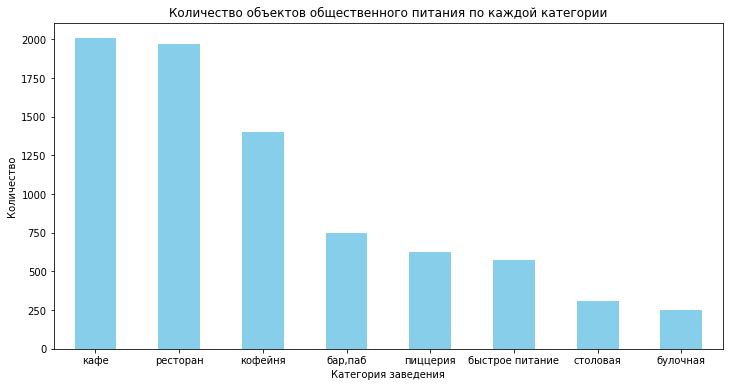

In [36]:
display(df_cleaned['category'].value_counts())
df_cleaned['category'].value_counts().plot(kind='bar',
title='Количество объектов общественного питания по каждой категории',
legend=False,
ylabel='Количество',
xlabel='Категория заведения',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()

На первом месте можно выделить две категории заведений: `кафе` и `ресторан`. В каждом из них количество пунктов общественного питания составляет примерно 2 000 единиц. На третьем месте идет `кофейня` с 1 300 заведениями. Остальные категории меньше по количеству более чем в два раза.

Распределение в процентах:

In [37]:
round(df_cleaned['category'].value_counts() / df_cleaned.shape[0], 2)

кафе               0.25
ресторан           0.25
кофейня            0.18
бар,паб            0.09
пиццерия           0.08
быстрое питание    0.07
столовая           0.04
булочная           0.03
Name: category, dtype: float64

---

#### Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [38]:
district_cnt = df_cleaned['district'].value_counts().sort_values(ascending=False)
display(district_cnt)

центральный административный округ         2215
северный административный округ             844
северо-восточный административный округ     829
южный административный округ                829
западный административный округ             787
восточный административный округ            723
юго-западный административный округ         650
юго-восточный административный округ        629
северо-западный административный округ      369
Name: district, dtype: int64

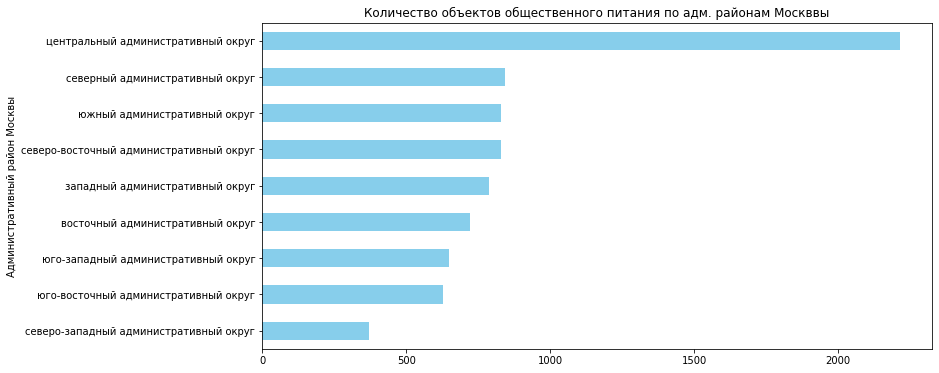

In [39]:
district_cnt.sort_values(ascending=True).plot(kind='barh',
title='Количество объектов общественного питания по адм. районам Москввы',
legend=False,
ylabel='Количество заведений',
xlabel='Административный район Москвы',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()

Уверенно лидирует `Центральный административный округ` с **2 215 заведениями**. Распределение заведений в остальных округах более менее равномерное и **не превышает 844 заведений**. Последнее место занимает `Северо-западный административный округ` с **369 заведениями**.

   
    
Посчитаем распределение в процентах:

In [40]:
round(district_cnt / df_cleaned.shape[0], 2)

центральный административный округ         0.28
северный административный округ            0.11
северо-восточный административный округ    0.11
южный административный округ               0.11
западный административный округ            0.10
восточный административный округ           0.09
юго-западный административный округ        0.08
юго-восточный административный округ       0.08
северо-западный административный округ     0.05
Name: district, dtype: float64

ресторан           665
кафе               446
кофейня            427
бар,паб            364
пиццерия           112
быстрое питание     86
столовая            65
булочная            50
Name: category, dtype: int64

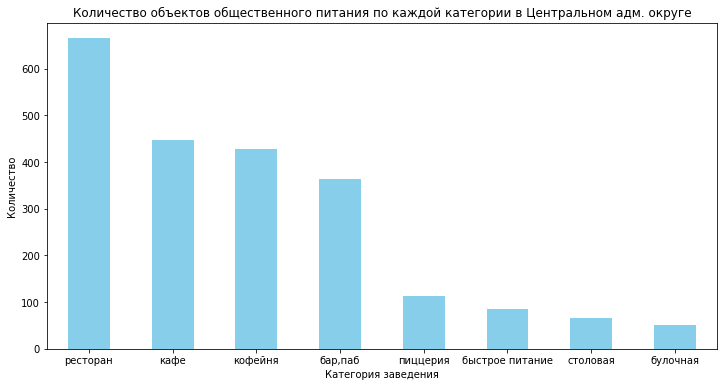

In [41]:
# Рассмотрим распределение категорий заведений в рамках Центрального административного округа
display(df_cleaned[df_cleaned['district']=='центральный административный округ']['category'].value_counts())

df_cleaned[df_cleaned['district']=='центральный административный округ']['category'].value_counts().plot(kind='bar',
title='Количество объектов общественного питания по каждой категории в Центральном адм. округе',
legend=False,
ylabel='Количество',
xlabel='Категория заведения',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()

В Центральном административном округе больше всего заведений (**665**) типа `ресторан`. На втором, третьем и четвертом местах расположились `кафе`, `кофейня` и `бар, паб` с средним количеством заведений в 412 единиц на каждую категорию. Остальные категории насчитывают не более 112 заведений. На последнем месте `булочная` с 50 заведениями.


Посчитаем распределение в процентах:

In [42]:
round(df_cleaned[df_cleaned['district']=='центральный административный округ']['category'].value_counts() 
      / df_cleaned[df_cleaned['district']=='центральный административный округ'].shape[0],2)

ресторан           0.30
кафе               0.20
кофейня            0.19
бар,паб            0.16
пиццерия           0.05
быстрое питание    0.04
столовая           0.03
булочная           0.02
Name: category, dtype: float64

---

#### Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

0    4786
1    3089
Name: chain, dtype: int64

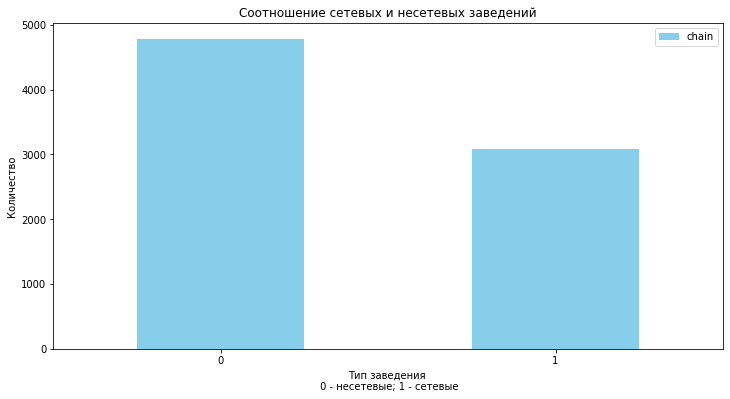

In [43]:
#Рассмотрим распределение заведений на сетевые и несетевые в целом
display(df_cleaned['chain'].value_counts())

df_cleaned['chain'].value_counts().plot(kind='bar',
title='Соотношение сетевых и несетевых заведений',
legend=True,
ylabel='Количество',
xlabel='Тип заведения \n 0 - несетевые; 1 - сетевые',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()


    
Для большей наглядности построим круговую диаграмму:

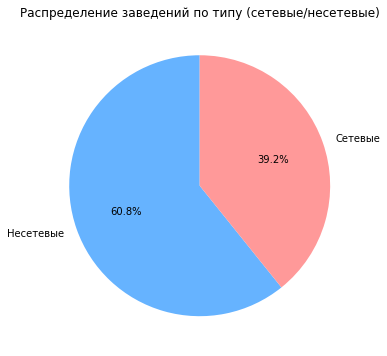

In [44]:
# Названия для круговой диаграммы
labels = ['Несетевые', 'Сетевые']

# Цвета для секций
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(8, 6))
plt.pie(df_cleaned['chain'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Распределение заведений по типу (сетевые/несетевые)')

plt.show()

Большинство заведений (**4 786**) не являются сетевыми. Количество сетевых заведений находится на отметке в **3 089** единиц.

chain,0,1
category,,
"бар,паб",589,158
булочная,95,154
быстрое питание,347,224
кафе,1295,712
кофейня,685,714
пиццерия,298,330
ресторан,1256,712
столовая,221,85


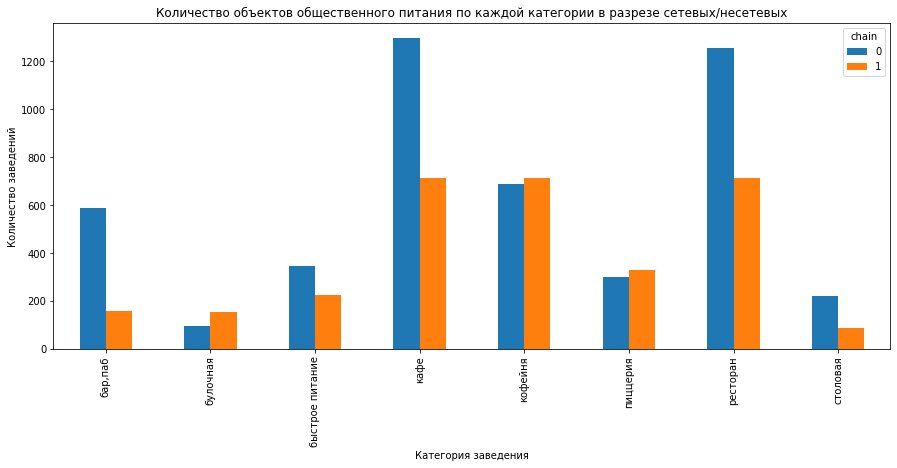

In [45]:
#Рассмотрим распределение количества объектов общественного питания по каждой категории в разрезе сетевых/несетевых
df_unstack = df_cleaned.groupby('category')['chain'].value_counts().unstack(fill_value=0)
display(df_unstack)

df_unstack.plot(kind='bar',
title='Количество объектов общественного питания по каждой категории в разрезе сетевых/несетевых',
legend=True,
ylabel='Количество заведений',
xlabel='Категория заведения',
rot=90,
figsize = (15, 6))

plt.show()

In [46]:
# Для большей наглядности покажем долю сетевых заведений в разрезе категорий
pivot_category = df_cleaned.pivot_table(index="category", values=["chain", "id"], aggfunc= {"chain" : "mean", "id" : "count"}).sort_values(by = 'chain', ascending=False)

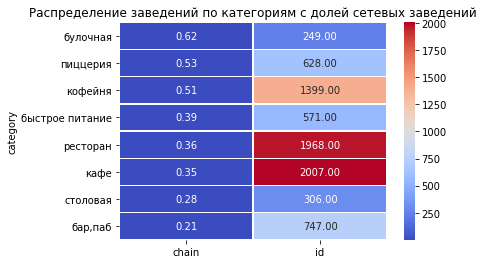

In [47]:
sns.heatmap(data=pivot_category, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Распределение заведений по категориям с долей сетевых заведений')

plt.show()

В разрезе категорий самое большое количество сетевых заведений наблюдается сразу в трех категориях: `кофейня`, `кафе` и `ресторан` (примерно 700 заведений на каждую категорию). Самое малое количество сетевых заведений у категории `столовая` (около 100 заведений).

Несетевых заведений больше всего в категориях `кафе` и `ресторан` (примерно 1 200 заведений на каждую категорию). на последнем месте - `булочная` (около 100 заведений).

Однако, смотря на данные в разрезе долвого распределения, можно отметить, что самая большая доля сетевых заведений наблюдается в категории `булочная` - **62% заведений являются сетевыми**. На втором и третьем месте категории `пиццерия` и `кофейня`. В них **доля сетевых заведений составляет в среднем 52%**. 

Для категорий `быстрое питание`, `кафе` и `ресторан` доля сетевых заведений в среднем составляет около 37%.

Наименьшая доля сетевых заведений 21% или **наибольшая доля несетевых заведений - 79%** наблюдается в категории `бар, паб`. **На втором месте** по доле несетевых заведений **72%** находится категория `столовая`.

---

#### Исследуем количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.


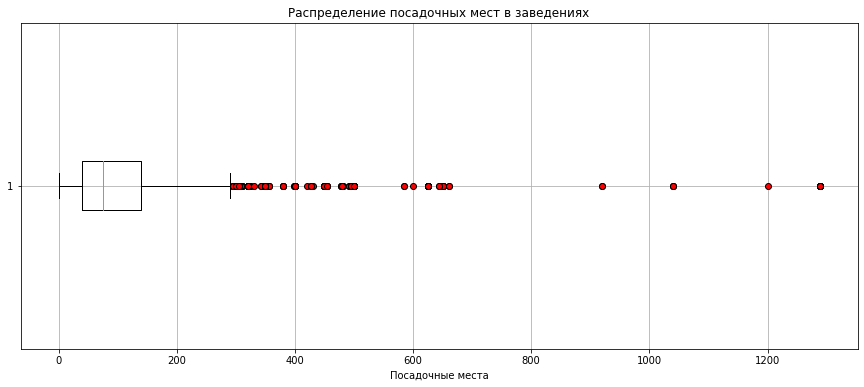

In [48]:
plt.figure(figsize=(15, 6))

plt.boxplot(df_cleaned[df_cleaned['seats'] != -1]['seats'], # Убираем значения-индикаторы пропусков
vert=False,
flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Распределение посадочных мест в заведениях')
plt.xlabel('Посадочные места')
plt.grid(True)

plt.show()

In [49]:
# Также для каждой категории проверим значения 99 процентилей:
df_cleaned[df_cleaned['seats'] != -1]['seats'].quantile(0.99)

625.0

Можно заметить распределение данных `seats` смещено влево и имеет большой правый хвост из выбросов, начиная от значения 300 заканчивая 1 300.

99% данных находятся в диапазоне от 0 до 625. 

Для более детального анализа рассмотрим распределение в разрезе категорий заведений:

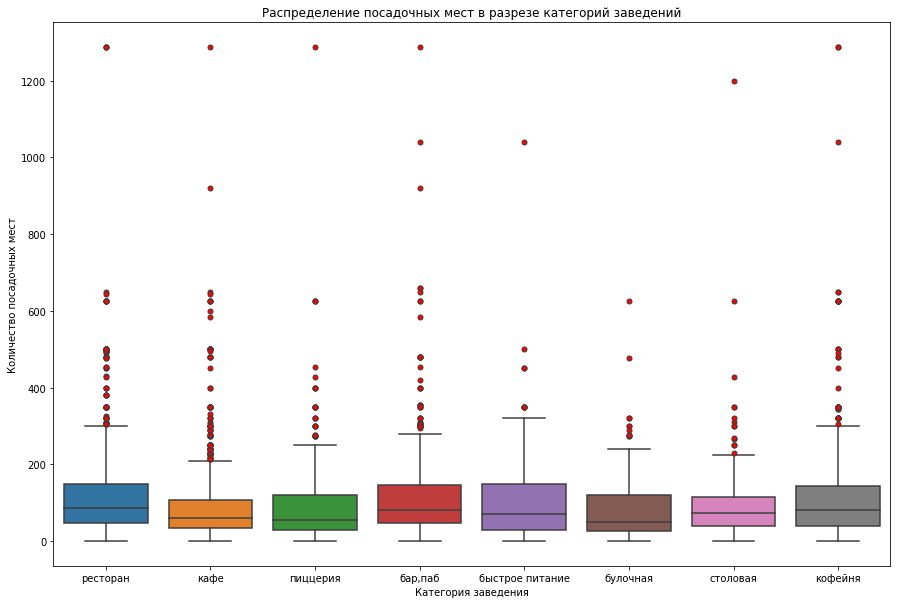

In [50]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cleaned[df_cleaned['seats'] != -1], y='seats', x='category', flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Распределение посадочных мест в разрезе категорий заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')

plt.show()

Можно заметить, что медианное значение для всех категорий заведений находится в районе 100 посадочных мест. Тем не менее данные значения завышены наличием больших выбросов во всех категориях. Практически для всех категорий максимальное количество посадочных мест без учета выбросов находится в диапазоне от 250 до 300 мест.

Для ресторанов и столовых такие значения могут быть обусловлены проведением банкетов с большим количеством посетителей, но для остальных категорий заведений такие значения не типичны и скорее всего являются ошибками.

Рассмотрим основную часть данных, исключив выбросы, начиная с 300 посадочных мест:

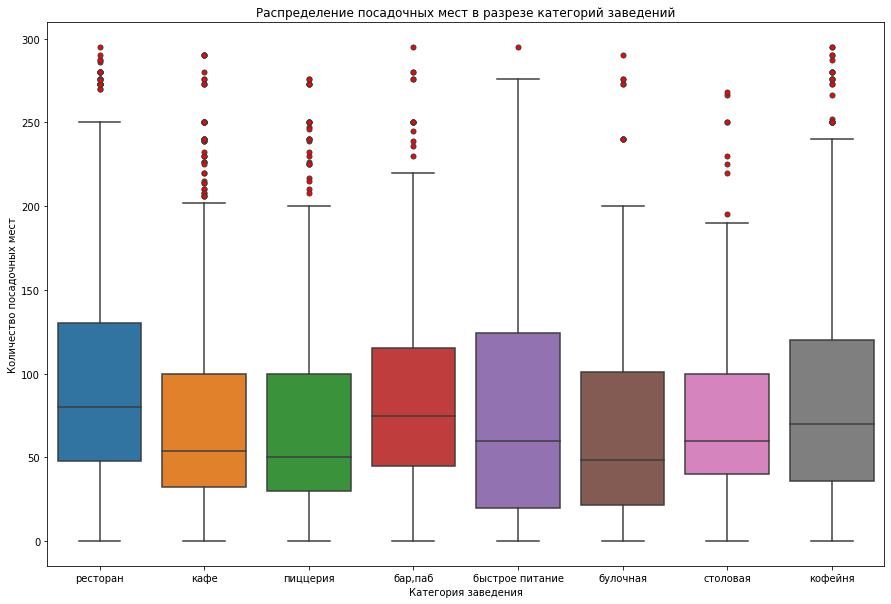

In [51]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cleaned[(df_cleaned['seats'] != -1) & (df_cleaned['seats'] < 300)], y='seats', x='category', flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Распределение посадочных мест в разрезе категорий заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Количество посадочных мест')

plt.show()

Несмотря на отсечение большинства выбросов, данные все равно сохранили правый хвост и левоориентированное распределение.

**Медианное значение** количества посадочных мест для категорий `кафе`, `пиццерия`, `быстрое питание`, `булочная`, `столовая` находится примерно на уровне **50**.

Для категорий `ресторан`, `бар, паб`, `кофейня` данное значение находится примерно на уровне **75**.

In [52]:
# На основе таблицы выше посчитаем среднее, стандартное отклоненние, минимальное и максимальное значения:
df_seatdrop = df_cleaned[(df_cleaned['seats'] != -1) & (df_cleaned['seats'] < 300)]

pivot_category_seats = df_seatdrop.pivot_table(index="category", values="seats", aggfunc=["mean", "std", "min", "max"])

display(pivot_category_seats)

,mean,std,min,max
,seats,seats,seats,seats
category,,,,
"бар,паб",88.555556,60.053532,0,295
булочная,77.178571,73.164963,0,290
быстрое питание,82.626230,73.914366,0,295
кафе,75.568507,62.843357,0,290
кофейня,86.033189,68.086504,0,295
пиццерия,76.793532,67.051137,0,276
ресторан,96.751111,66.626771,0,295
столовая,77.691275,57.170430,0,268


По стандартному отклонению видно, что разброс данных довольно большой. Кроме этого средние значения значительно отличаются от медианных. Что говорит о неравномерном распределении данных.

---

#### Исследуем рейтинг заведений.

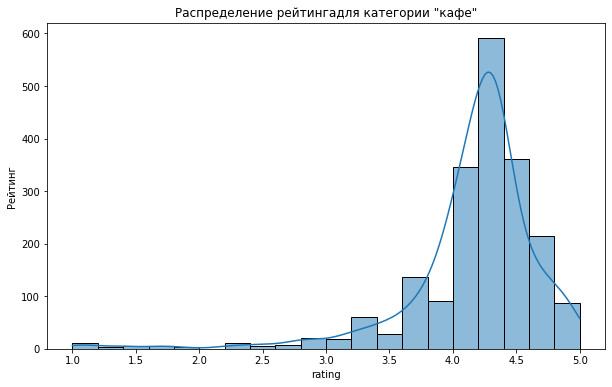

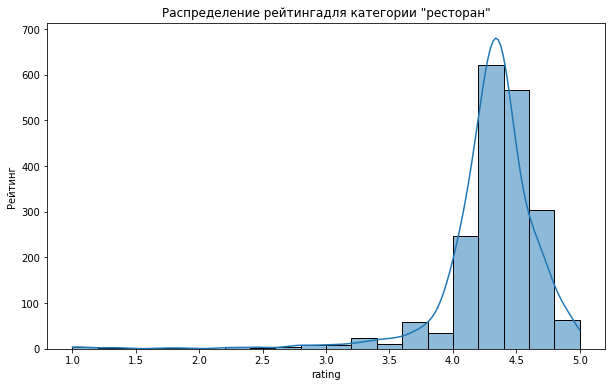

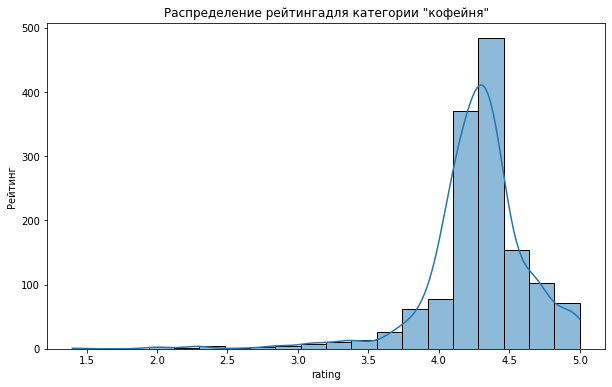

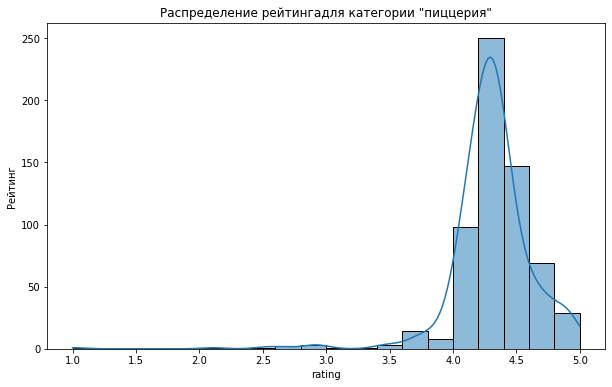

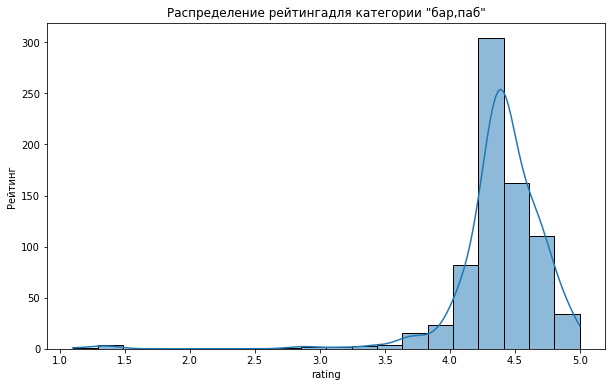

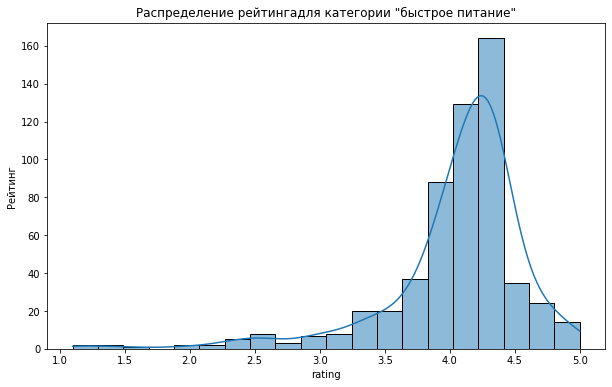

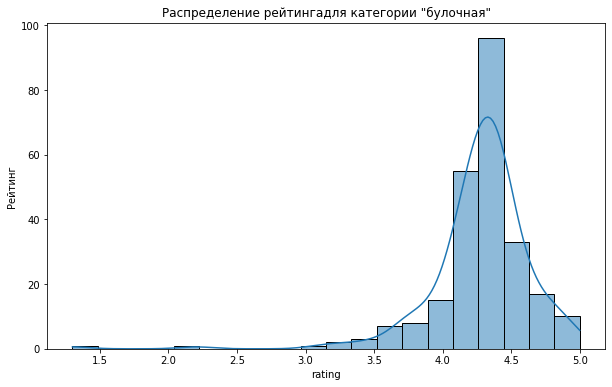

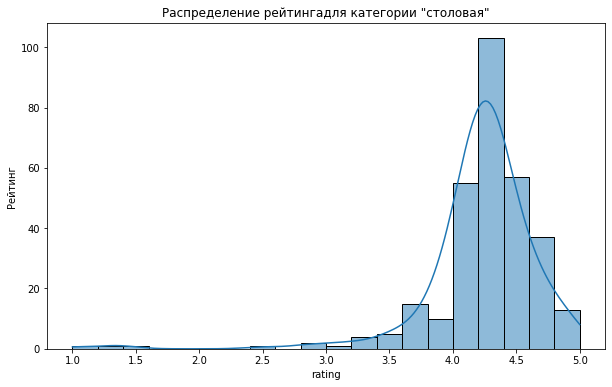

In [53]:
for i in df_cleaned['category'].unique():
    plt.figure(figsize=(10, 6))
    
    sns.histplot(data=df_cleaned[(df_cleaned['rating'] != -1) & (df_cleaned['category'] == i)], x='rating', bins = 20, kde = True)
    plt.title(f'Распределение рейтингадля категории "{i}"')
    plt.ylabel('Рейтинг')
    plt.show()

Визуально распределения рейтингов во всех категориях заведений выглядят примерно одинаково. Данные сосредоточены в правой части гистограммы и имеют левый хвост, представленный низким значением рейтинга.

Переведем представленные графики в числовые значения:

In [54]:
for i in df_cleaned['category'].unique():
    display(f'Описание рейтинга в категории "{i}":')
    display(df_cleaned[(df_cleaned['rating'] != -1) & (df_cleaned['category'] == i)]['rating'].describe())

'Описание рейтинга в категории "кафе":'

count    2007.000000
mean        4.151370
std         0.543058
min         1.000000
25%         4.000000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "ресторан":'

count    1968.000000
mean        4.296189
std         0.401460
min         1.000000
25%         4.200000
50%         4.300000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "кофейня":'

count    1399.000000
mean        4.275125
std         0.372148
min         1.400000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "пиццерия":'

count    628.000000
mean       4.301433
std        0.337381
min        1.000000
25%        4.200000
50%        4.300000
75%        4.400000
max        5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "бар,паб":'

count    747.000000
mean       4.394645
std        0.377835
min        1.100000
25%        4.300000
50%        4.400000
75%        4.600000
max        5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "быстрое питание":'

count    571.000000
mean       4.058319
std        0.547607
min        1.100000
25%        3.900000
50%        4.200000
75%        4.300000
max        5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "булочная":'

count    249.000000
mean       4.276707
std        0.379754
min        1.300000
25%        4.200000
50%        4.300000
75%        4.400000
max        5.000000
Name: rating, dtype: float64

'Описание рейтинга в категории "столовая":'

count    306.000000
mean       4.217320
std        0.458859
min        1.000000
25%        4.100000
50%        4.300000
75%        4.400000
max        5.000000
Name: rating, dtype: float64


    
Для большей наглядности создадим сводную таблицу:

In [55]:
df_clean_rating = df_cleaned[df_cleaned['rating'] != -1]

pivot_category_rating = df_clean_rating.pivot_table(
    index="category", values="rating",aggfunc=['mean', 'std', 'min', 'max', 'count', 'median'])

display(pivot_category_rating)

,mean,std,min,max,count,median
,rating,rating,rating,rating,rating,rating
category,,,,,,
"бар,паб",4.394645,0.377835,1.1,5.0,747,4.4
булочная,4.276707,0.379754,1.3,5.0,249,4.3
быстрое питание,4.058319,0.547607,1.1,5.0,571,4.2
кафе,4.151370,0.543058,1.0,5.0,2007,4.3
кофейня,4.275125,0.372148,1.4,5.0,1399,4.3
пиццерия,4.301433,0.337381,1.0,5.0,628,4.3
ресторан,4.296189,0.401460,1.0,5.0,1968,4.3
столовая,4.217320,0.458859,1.0,5.0,306,4.3


Описательные статистики подтверждают схожесть распределения данных. **Средние значения рейтинга** всех категорий находятся примерно на одном уровне в **4.3 балла**. В качестве исключения можно выделить категорию `быстрое питание` со средним рейтингом 4.0 балла. Самым высоким средним рейтингом выделяется категория `бар, паб` со значением 4.4 балла. 

Стандартное отклонение в данных не превышает 0.5 и средние значения схожи с медианными, что говорит о похожем на нормальное распределение данных.

---

#### Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений.

interval columns not set, guessing: ['rating', 'chain', 'seats']


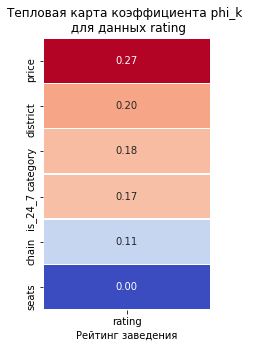

In [56]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_cleaned[df_cleaned['rating'] != -1][['rating', 'category', 'district', 'chain', 'seats',
                         'price', 'is_24_7']].phik_matrix()

df_rating_heat = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

plt.figure(figsize=(3, 5))

sns.heatmap(df_rating_heat,
            annot=True, # Отображаем численные значения в ячейках
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведения')

plt.show()

Видим, что в данных нет переменных которые бы имели значимую связь с переменной `rating`. Однако стоит отметить, что самой сильной связью отличается переменная `price`, коэффициент корреляции которой составляет **0.27**. Проверим ее связь на отдельном графике:

In [57]:
pivot_price_rating = df_cleaned[df_cleaned['rating'] != -1].pivot_table(index="price", values="rating", aggfunc=["mean", "min", "max", "count"])

display(pivot_price_rating)

,mean,min,max,count
,rating,rating,rating,rating
price,,,,
no_info,4.184254,1.0,5.0,4560
высокие,4.436611,1.0,5.0,478
выше среднего,4.386348,2.9,5.0,564
низкие,4.173077,2.6,5.0,156
средние,4.297874,1.6,5.0,2117


Можно увидеть, что среднее значение рейтинга и правда растет в зависимости от ценовой категории заведения, хоть и незначительно.

---

#### Найдем топ-15 популярных сетей в Москве. 

In [58]:
df_top15 = df_cleaned.groupby('name', as_index=False).agg({'rating' : 'mean', 'id': 'count'}).sort_values(by = 'id', ascending = False).head(15)

display(df_top15)

,name,rating,id
5139,шоколадница,4.177500,120
2699,кафе,3.824000,100
2426,домино'с пицца,4.171429,77
2397,додо пицца,4.286486,74
1102,one price coffee,4.069444,72
5207,яндекс лавка,3.870588,68
400,cofix,4.075385,65
1227,prime,4.116000,50
3021,кофепорт,4.147619,42
4733,хинкальная,4.374359,39


Самой популярной сетью в регионе оказалась `Шоколадница` с 120 точками. На втором месте заведение `кафе` с 100 точками. Однако можем предположить, что данные заведения могут быть не связаны между собой, так как `кафе` - это собирательное название заведений. Последнее место ТОП-15 занимает заведение `Буханка` с 31 точкой. Значения среднего рейтинга могут быть не очень точные, так как в столбце присутствуют значения-индикаторы `-1`. Попробуем вывести этот же ТОП без учета пропусков в столбце `rating`:

In [59]:
df_top15_drop = df_cleaned[df_cleaned['rating'] != -1].groupby('name', as_index=False).agg({'rating' : 'mean', 'id': 'count'}).sort_values(by = 'id', ascending = False).head(15)

display(df_top15_drop)

,name,rating,id
5139,шоколадница,4.177500,120
2699,кафе,3.824000,100
2426,домино'с пицца,4.171429,77
2397,додо пицца,4.286486,74
1102,one price coffee,4.069444,72
5207,яндекс лавка,3.870588,68
400,cofix,4.075385,65
1227,prime,4.116000,50
3021,кофепорт,4.147619,42
4733,хинкальная,4.374359,39


Таблицы идентичны, значит, что пропуски в столбце `rating` не коснулись выбранных наблюдений.

In [60]:
#Рассчитаем какие категории присутствуют в разрезе каждого названия заведения
for i in df_top15['name']:
    display(f'Категории заведений с названием "{i}"')
    display(df_cleaned[df_cleaned['name'] == i]['category'].value_counts())

'Категории заведений с названием "шоколадница"'

кофейня    119
кафе         1
Name: category, dtype: int64

'Категории заведений с названием "кафе"'

кафе               78
кофейня             6
ресторан            6
столовая            6
быстрое питание     4
Name: category, dtype: int64

'Категории заведений с названием "домино\'с пицца"'

пиццерия    77
Name: category, dtype: int64

'Категории заведений с названием "додо пицца"'

пиццерия    74
Name: category, dtype: int64

'Категории заведений с названием "one price coffee"'

кофейня    72
Name: category, dtype: int64

'Категории заведений с названием "яндекс лавка"'

ресторан    68
Name: category, dtype: int64

'Категории заведений с названием "cofix"'

кофейня    65
Name: category, dtype: int64

'Категории заведений с названием "prime"'

ресторан    49
кафе         1
Name: category, dtype: int64

'Категории заведений с названием "кофепорт"'

кофейня    42
Name: category, dtype: int64

'Категории заведений с названием "хинкальная"'

кафе               16
ресторан           15
быстрое питание     4
бар,паб             3
столовая            1
Name: category, dtype: int64

'Категории заведений с названием "кулинарная лавка братьев караваевых"'

кафе    39
Name: category, dtype: int64

'Категории заведений с названием "теремок"'

ресторан           36
быстрое питание     2
Name: category, dtype: int64

'Категории заведений с названием "шаурма"'

быстрое питание    25
кафе                7
булочная            1
Name: category, dtype: int64

'Категории заведений с названием "cofefest"'

кофейня    31
кафе        1
Name: category, dtype: int64

'Категории заведений с названием "буханка"'

булочная    24
кофейня      6
кафе         1
Name: category, dtype: int64

Заведение `Шоколадница` представлено в регионе как **`кофейня` - 119 раз** и как **`кафе` - 1 раз**. 

Заведение `кафе` **78 раз представлено как `кафе`** остальные точки практически равномерно распределены по категориям **`столовая`, `кофейня`, `ресторан`, `быстрое питание`**.

Остальные заведения включают в себя такие категории как **`пиццерия`, `булочная`, `бар,паб`**

кофейня            341
ресторан           174
пиццерия           151
кафе               144
быстрое питание     35
булочная            25
столовая             7
бар,паб              3
Name: category, dtype: int64

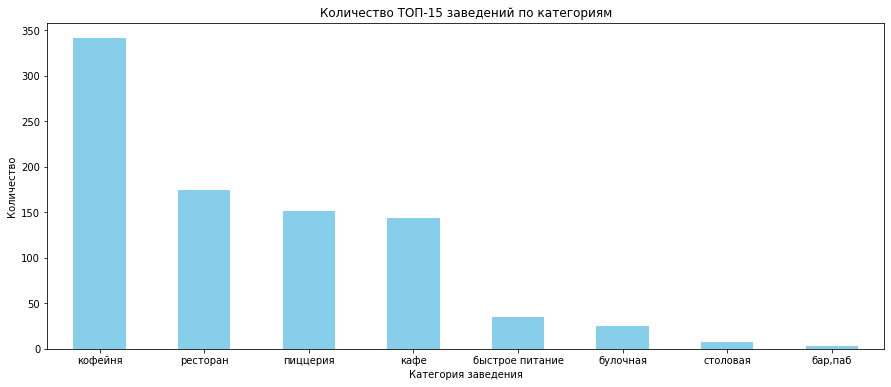

In [61]:
#Рассмотрим распределение категорий заведений в общем в рассчитанном ранее ТОП 15
df_top15_cat = df_top15.merge(df_cleaned[['name', 'category']], on='name', how='left')
df_top_cat = df_top15_cat['category'].value_counts()
display(df_top_cat)

df_top_cat.plot(kind='bar',
title='Количество ТОП-15 заведений по категориям',
legend=False,
ylabel='Количество',
xlabel='Категория заведения',
rot=0,
color='skyblue',
figsize = (15, 6))
plt.show()

График показывает, что большинство заведений в датафрейме представленны в категории **`кофейня`** - **341 заведениt**.

После идут категории **`ресторан`, `пиццерия` и `кафе`** - **в среднем 156 заведений** в каждой категории.

Оставшиеся категории **`быстрое питание`, `булочная`, `столовая`, `бар,паб`** разместились на последнем месте с количеством заведений в диапазоне **от 3 до 35 единиц**.

---

#### Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. 


In [62]:
# Избавимся от пропусков в столбце middle_avg_bill для корректности расчетов и выведем сводную таблицу
pivot_district_bill = df_cleaned[df_cleaned['middle_avg_bill'] != -1].pivot_table(index="district", values="middle_avg_bill", aggfunc=["mean", "min", "max"])

display(pivot_district_bill)

,mean,min,max
,middle_avg_bill,middle_avg_bill,middle_avg_bill
district,,,
восточный административный округ,820.626923,50.0,10000.0
западный административный округ,1053.225490,50.0,5250.0
северный административный округ,927.959627,130.0,11000.0
северо-восточный административный округ,716.611296,50.0,4500.0
северо-западный административный округ,822.222930,120.0,2900.0
центральный административный округ,1191.057547,0.0,7250.0
юго-восточный административный округ,654.097938,30.0,3750.0
юго-западный административный округ,792.561702,100.0,2750.0


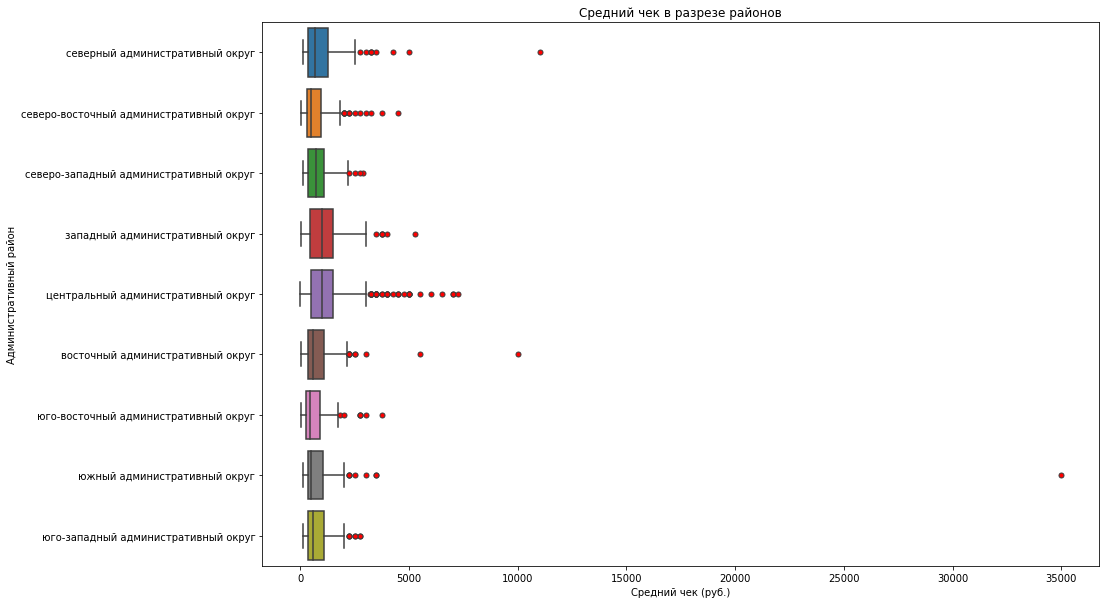

In [63]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cleaned[df_cleaned['middle_avg_bill'] != -1], y='district', x='middle_avg_bill', flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Средний чек в разрезе районов')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Административный район')

plt.show()

Как видим в данных присутствуют аномально большие значения, чв размере 10 000 руб. и даже 35 000 руб., что скорее всего не является ошибкой, так как некоторые заведения могут обладать уникальными дорогостоящими блюдами. Рассмотрим распределение значений без учета аномалий:

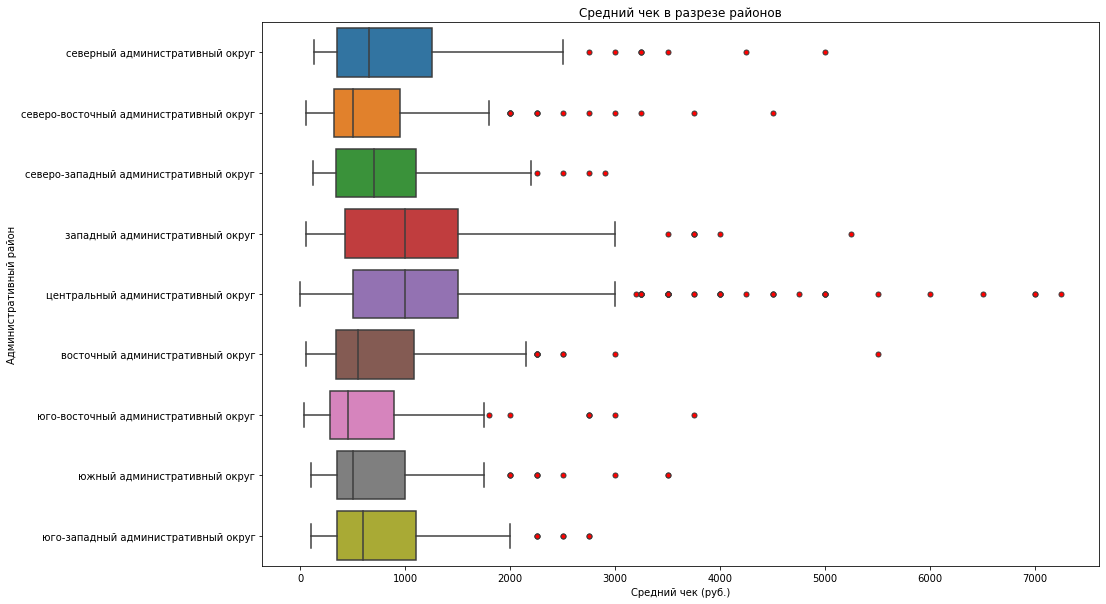

In [64]:
plt.figure(figsize=(15, 10))

sns.boxplot(data=df_cleaned[(df_cleaned['middle_avg_bill'] != -1) & (df_cleaned['middle_avg_bill'] < 10000)], y='district', x='middle_avg_bill', flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Средний чек в разрезе районов')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Административный район')

plt.show()

Без учета аномалий среднее значение чека по всем регионам находится в районе 800 рублей. Самыми большими средними значениями отличаются `Центральный` и `Западный` районы. Их значения чуть больше 1 000 рублей.

district
юго-восточный административный округ        654.10
северо-восточный административный округ     716.61
юго-западный административный округ         792.56
восточный административный округ            820.63
северо-западный административный округ      822.22
южный административный округ                834.40
северный административный округ             927.96
западный административный округ            1053.23
центральный административный округ         1191.06
Name: middle_avg_bill, dtype: float64

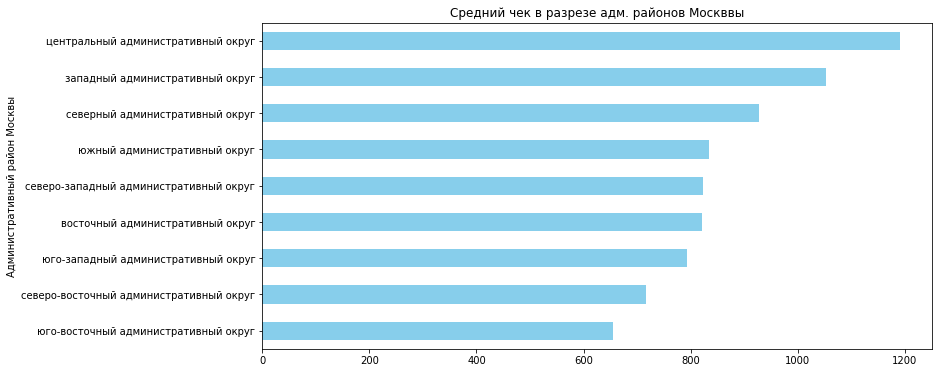

In [65]:
# Построим линейчатую диаграмму со значениями среднего чека по убыванию
district_bill_mean = df_cleaned[df_cleaned['middle_avg_bill'] != -1].groupby('district')['middle_avg_bill'].mean().sort_values( ascending = True)
display(round(district_bill_mean,2))

district_bill_mean.plot(kind='barh',
title='Средний чек в разрезе адм. районов Москввы',
legend=False,
ylabel='Средний чек (руб.)',
xlabel='Административный район Москвы',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()

Средние чеки распределились в значениях от 654 рублей до 1 191 рубля. Первое место занимает `Центральный административный округ` со средним чеком **1 191 руб**. Последнее место - `Юго-Восточный административный округ`со средним чеком **654 руб**. 

Кроме Центрального округа большим средним чеком отличается также `Западный административный округ`со средним чеком **1 053 руб**. Средний чек остальных округов находится в районе **800 руб.**.

---

#### Проверим другие взаимосвязи.


interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']


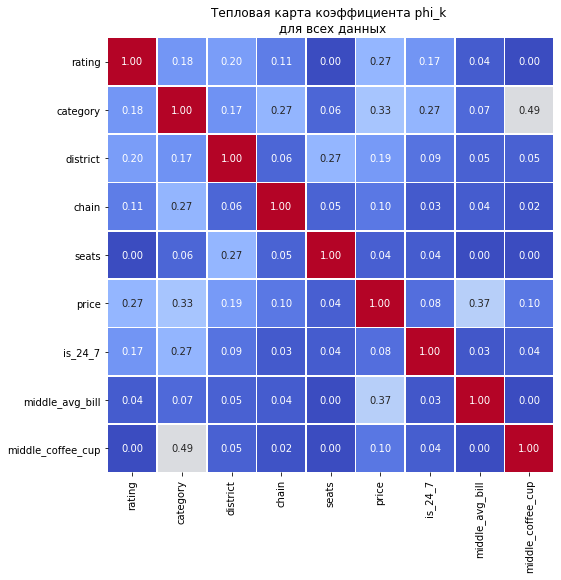

In [66]:
# Проверим как связаны все переменные в датафрейме
correlation_all = df_cleaned[['rating', 'category', 'district', 'chain', 'seats',
                              'price', 'is_24_7', 'middle_avg_bill', 'middle_coffee_cup']].phik_matrix()
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_all,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для всех данных')

plt.show()

Заметим, что самая сильная связь из всех **(0.49)** прослеживается между переменными `category` и `middle_coffee_cup`. Проверим эту связь более детально.

In [67]:
#Рассмотрим описательную статистику средней цены чашки кофе для всех заведений
for i in df_cleaned['category'].unique():
    display(f'Описание средней цены чашки кофе в категории "{i}":')
    display(df_cleaned[(df_cleaned['middle_coffee_cup'] != -1) & (df_cleaned['category'] == i)]['middle_coffee_cup'].describe())

'Описание средней цены чашки кофе в категории "кафе":'

count      4.000000
mean     105.500000
std       21.393145
min       75.000000
25%      101.250000
50%      111.000000
75%      115.250000
max      125.000000
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "ресторан":'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "кофейня":'

count     521.000000
mean      175.055662
std        89.753009
min        60.000000
25%       124.000000
50%       170.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "пиццерия":'

count      3.000000
mean     153.333333
std        5.773503
min      150.000000
25%      150.000000
50%      150.000000
75%      155.000000
max      160.000000
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "бар,паб":'

count      6.000000
mean     208.333333
std       35.308167
min      170.000000
25%      180.000000
50%      202.500000
75%      240.000000
max      250.000000
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "быстрое питание":'

count      1.0
mean     140.0
std        NaN
min      140.0
25%      140.0
50%      140.0
75%      140.0
max      140.0
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "булочная":'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: middle_coffee_cup, dtype: float64

'Описание средней цены чашки кофе в категории "столовая":'

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: middle_coffee_cup, dtype: float64

Сразу можно заметить, что для категорий `ресторан`, `булочная` и `столовая` нет данных о цене на чашку кофе. В наблюдениях для следующих категорий также не выявлено много заведений с информацией о цене:
- `быстрое питание` - 1 наблюдение;
- `пиццерия` - 3 наблюдения;
- `кафе` - 4 наблюдение;
- `бар,паб` - 6 наблюдений.
- И только в категории `кофейня` информация о цене присутствует для 521 заведения.

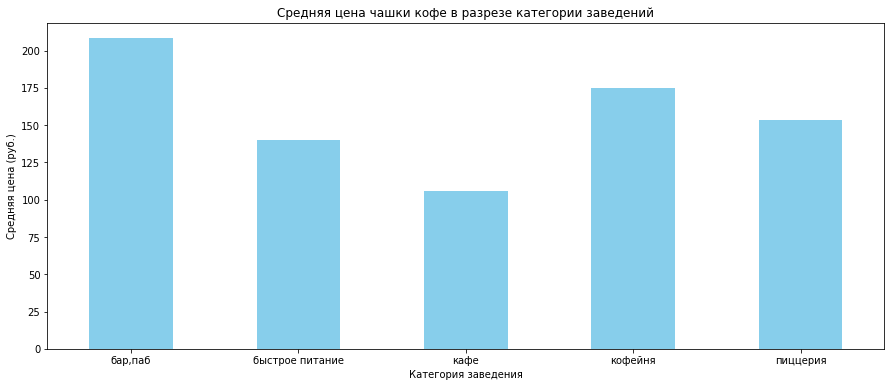

In [68]:
df_coffee = df_cleaned[df_cleaned['middle_coffee_cup'] != -1].groupby('category')['middle_coffee_cup'].mean()

df_coffee.plot(kind='bar',
title='Средняя цена чашки кофе в разрезе категории заведений',
ylabel='Средняя цена (руб.)',
xlabel='Категория заведения',
rot=0,
color='skyblue',
figsize = (15, 6))

plt.show()

Самое дорогое кофе находится в категории `бар,паб`, там средняя цена за чашку - **208 руб.**

Самое дешевое  - в категории `кафе`, со средней ценой - **105 руб.**

В самой крупной выборке заведений из категории `кофейня`средняя цена составила - **175 руб.**

Несмотря на это, данные не совсем правдоподобные из-за небольшого количества наблюдений.

  
    
Так как для большинства категорий данных недостаточно для качественного анализа, мы можем сделать вывод только для категории `кофейня`: в ней средняя цена чашки кофе составила - **175 руб.**

Рассмотрим еще одну зависимость переменной `category` и индикатора круглосуточной работы заведения `is_24_7`(коэффициент корреляции между ними составил 0.27)

category
быстрое питание    0.26
кафе               0.13
булочная           0.10
бар,паб            0.07
ресторан           0.07
пиццерия           0.05
кофейня            0.04
столовая           0.04
Name: is_24_7, dtype: float64

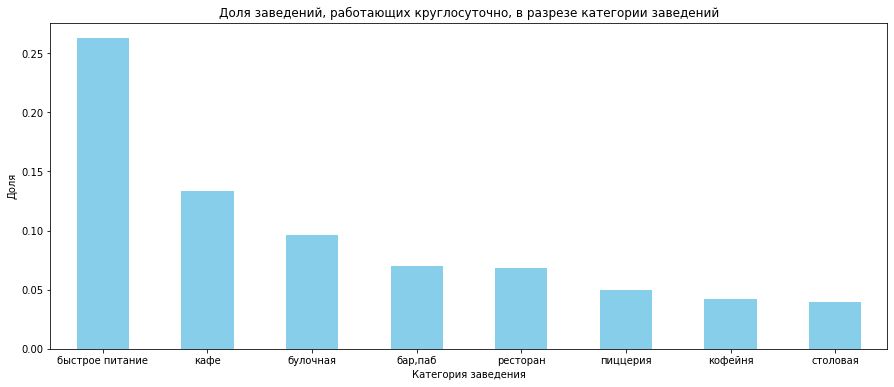

In [69]:
#Посмотрим на долю заведений, работающих круглосуточно
df_is_24_7 = df_cleaned.groupby('category')['is_24_7'].mean().sort_values(ascending = False)
display(round(df_is_24_7,2))

df_is_24_7.plot(kind='bar',
title='Доля заведений, работающих круглосуточно, в разрезе категории заведений',
ylabel='Доля',
xlabel='Категория заведения',
rot=0,
color='skyblue',
figsize = (15, 6))

plt.show()

Можно отметить, что ни одна категория не отличается высокой долей круглосуточных заведений.

Самая большая доля **26%** приходится на категорию `быстрое питание`. На втором меесте `кафе` с долей **13%**. Наименьшая доля чуть меньше **4%** наблюдается в категории `столовая`. Доля остальных категорий находится в диапазоне от 5 до 10%.

In [70]:
#Посмотрим на количество заведений, работающих круглосуточно в абсолютных значениях
df_is_24_7_sum = df_cleaned.groupby('category')['is_24_7'].sum().sort_values(ascending = False)
display(df_is_24_7_sum)

category
кафе               267
быстрое питание    150
ресторан           135
кофейня             59
бар,паб             52
пиццерия            31
булочная            24
столовая            12
Name: is_24_7, dtype: int64

Несмотря на самую большую долю, категория `быстрое питание` находится лишь на втором месте по количеству круглосуточных заведений **(150 единиц)**. На первом месте находится категория `кафе` с **267 заведениями**. Последнее место в абсолютных значениях, как и в относительных, занимает `столовая` с **12 единицами**.

---

### Промежуточный вывод


На данном этапе был проведен детальный анализ переменных датафрейма, а также их связей друг с другом. В качестве основных выводом можно выделить следующее:

**1. Описание данных:**
   - Основное количество заведений из датафрейма представлено в категориях `ресторан` `кафе` и `кофейня`. Первые две категории насчитывают порядка **2 000 заведений в каждой**. Последняя около **1 300 заведений**;
   - Основное количество заведений сосредоточено в `Центральном административном округе` Москвы. Там количество заведений **превышает 2 000**. В `Северо-Западном административном округе` наименьшее количество заведений - **около 400**. В остальных районах насчитывается около **700-800 заведений**;
   - В `Центральном административном округе` как и во всей выборке основу заведений составляют такие категории как: `ресторан` `кафе` `кофейня`, а также `бар,паб`;
   - В выборке преобладают несетевые заведения: около **4 900 несетевых и 3 000 - сетевых**. Самая большая доля **(62%)** сетевых заведений находится в категории `булочная`. Также высокой долей **(52%)** отличаются `пиццерия` и `кофейня`. Напротив, самоая большая доля **(79%)** несетевых заведений представлена в категории `бар,паб`;
   - Данные количества сидячих мест имеют много аномально больших выбросов, в то время как 99% данных находятся в диапазоне от 0 до 625. Приемлимо большие значения можно трактовать, как количество мест для банкетных мероприятий, однако аномальные значения скорее всего являются ошибками. Убрав аномальные данные, можно отметить, что **медианное значение** количества посадочных мест для категорий `кафе`, `пиццерия`, `быстрое питание`, `булочная`, `столовая` находится примерно на уровне **50**. Для категорий `ресторан`, `бар, паб`, `кофейня` данное значение находится примерно на уровне **75**.
   - Рейтинг в разрезе категорий имеет довольно одинаковое распределение. Основная чать близка к 4.5 и имеется левый хвост из небольшого количества низких рейтингов. **Средний рейтинг всех категорий равен около 4.3 баллам**.
   
**2. Взаимосвязи данных:**
   - Самую большую корреляцию **0.49** показали переменные `category` и `middle_coffee_cup`. Однако это могло быть вызвано недостаточным количеством данных;
   - Связь переменных  `rating` и `price` показала, что с увеличением ценовой категории, увиличивается и рейтинг заведения, хоть и незначительно:
   - Самой популярной сетью в регионе оказалась `Шоколадница` с 120 точками. На втором месте заведение `кафе` с 100 точками. Последнее место ТОП-15 популярных заведений занимает `Буханка` с 31 точкой. Наибольшее количество заведений в ТОПе представленов категории **`кофейня`** - **около 340 заведений**. После идут категории **`ресторан`, `пиццерия` и `кафе`** - **около 150 заведений** в каждой категории.
   - В данных среднего чека заведений присутствуют аномально большие значения, которые можно объяснить наличием уникальных дорогостоящих блюд. Без их учета **среднее значение чека по всем округам находится в районе 800 руб.** Самыми большими средними значениями отличаются `Центральный` и `Западный` районы. Их значения **больше 1 000 руб.**
   - В датафрейме преобладают не круглосуточные заведения. В разрезе категорий **самая большая доля круглосуточных заведений составила около 25%** для категории `быстрое питание`. В абсолютных значениях это **150 заведений**.

## 4. Детальное исследование пиццерий

---

#### Вычислим долю пиццерий в каждом районе от общего количества заведений. 

In [71]:
# Вычислим сколько всего пиццерий в датасете
df_cleaned[df_cleaned['category'] == 'пиццерия'].shape[0]

628

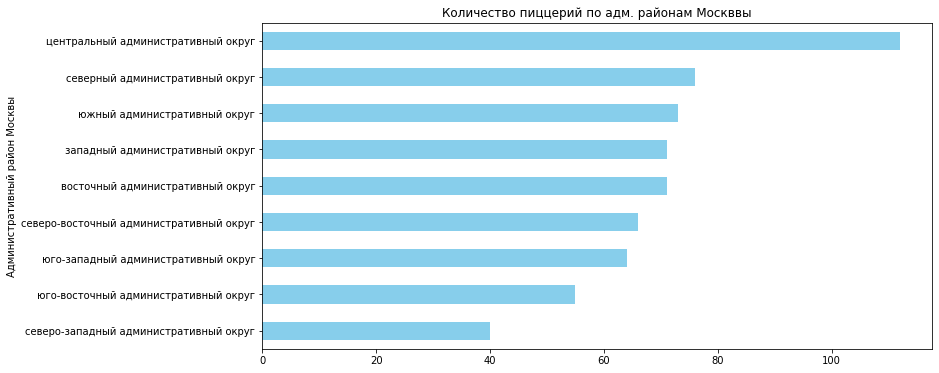

In [72]:
#Посмотрим на количество пиццерий в разрезе районов
pizza = df_cleaned[df_cleaned['category'] == 'пиццерия'].groupby('district')['category'].count().sort_values(ascending = True)

pizza.plot(kind='barh',
title='Количество пиццерий по адм. районам Москввы',
legend=False,
ylabel='Количество пиццерий',
xlabel='Административный район Москвы',
rot=0,
color='skyblue',
figsize = (12, 6))
plt.show()

In [73]:
# Теперь посчитаем долю пиццерий от общего количества заведений в разрезе районов

# считаем общее количетво заведений в разрезе районов и создаем из этого новый датафрейм
df_district_total = df_cleaned.groupby('district')['category'].count().reset_index(name = 'total_count')

# переводим ранее сгруппированную таблицу в датафрейм
df_pizza = pizza.reset_index(name = 'pizza_count')

# соединяем датафреймы
df_pizza_total = df_pizza.merge(df_district_total, on = 'district')

# считаем долю
df_pizza_total['pizza_share'] = round(df_pizza_total['pizza_count'] / df_pizza_total['total_count'], 2)

display(df_pizza_total.sort_values(by = 'pizza_share', ascending = False))

,district,pizza_count,total_count,pizza_share
0,северо-западный административный округ,40,369,0.11
2,юго-западный административный округ,64,650,0.10
4,восточный административный округ,71,723,0.10
1,юго-восточный административный округ,55,629,0.09
5,западный административный округ,71,787,0.09
6,южный административный округ,73,829,0.09
7,северный административный округ,76,844,0.09
3,северо-восточный административный округ,66,829,0.08
8,центральный административный округ,112,2215,0.05


Несмотря на то, что в `Центральном адм. округе` больше всего пиццерий - **2 215 заведений**, их **доля** от общего числа наименьшая и составляет **5%**.

Обратная ситуация у `Северо-Западного адм. округа`, там меньше всего пиццерий - **40 заведений**, но их **доля** составляет **11%**, что является наибольшим результатом среди районов.

Доля пиццерий в остальных районах составляет примерно **9%**. А их количество находится в промежутке от 55 до 76.

---

#### Определим характеристику типовой пиццерии: сколько в ней посадочных мест, какой средний чек или стоимость чашки кофе, какой средний рейтинг? Какая доля сетевых и круглосуточных заведений?

In [74]:
# Общее количество пиццерий в данных
df_cleaned[df_cleaned['category'] == 'пиццерия'].shape[0]

628

In [75]:
# Рассчитаем основные показатели
pizza_info = df_cleaned[df_cleaned['category'] == 'пиццерия'].groupby('category').agg({'seats': 'mean',
                                                                                      'middle_avg_bill': 'mean',
                                                                                      'middle_coffee_cup': 'mean',
                                                                                      'rating': 'mean',
                                                                                      'chain': 'mean',
                                                                                      'is_24_7': 'mean'})
display(pizza_info)

,seats,middle_avg_bill,middle_coffee_cup,rating,chain,is_24_7
category,,,,,,
пиццерия,63.407643,496.132166,-0.262739,4.301433,0.525478,0.049363


Стоит учесть, что в некоторых данных присутствуют значения-индикаторы пропусков `-1`, что влияет на результаты расчетов, поэтому уберем их из анализа, это не относится к значениям среднего рейтинга **4.3**, доли сетевых заведений **52%** и доли круглосуточных заведений **5%**.

In [76]:
# Расчет среднего значения посадочных мест
df_pizza_seats = df_cleaned[(df_cleaned['category'] == 'пиццерия') & (df_cleaned['seats'] != -1)]
display('Среднее количество посадочных мест:')
display(round(df_pizza_seats['seats'].mean(),0))

'Среднее количество посадочных мест:'

95.0

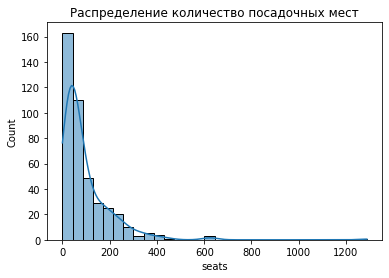

In [77]:
sns.histplot(data=df_pizza_seats, x='seats', bins=30, kde=True)
plt.title('Распределение количество посадочных мест')

plt.show()

Распределение смещено влево с **большинством значений в диапазоне от 0 до 50**. Существуют аномально большие выбросы.

In [78]:
# Расчет среднего чека
df_pizza_bill = df_cleaned[(df_cleaned['category'] == 'пиццерия') & (df_cleaned['middle_avg_bill'] != -1)]
display('Средний чек:')
display(round(df_pizza_seats['middle_avg_bill'].mean(),2))

'Средний чек:'

503.4

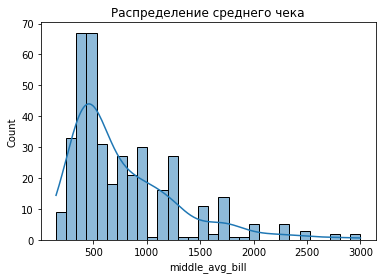

In [79]:
sns.histplot(data=df_pizza_bill, x='middle_avg_bill', bins=30, kde=True)
plt.title('Распределение среднего чека')

plt.show()

Большинство значений и правда расположены в районе 500 рублей, кроме этого имеются выбросы в правой части распределения.

In [80]:
# Расчет средней стоимости чашки кофе
df_pizza_coffee = df_cleaned[(df_cleaned['category'] == 'пиццерия') & (df_cleaned['middle_coffee_cup'] != -1)]
display('Средний стоимость чашки кофе:')
display(round(df_pizza_coffee['middle_coffee_cup'].mean(),2))

'Средний стоимость чашки кофе:'

153.33

In [81]:
df_pizza_coffee.shape[0]

3

В категории пиццерий находится всего три наблюдения с ценой за чашку кофе, поэтому визуализация распределения значений в этом случае не информативна.

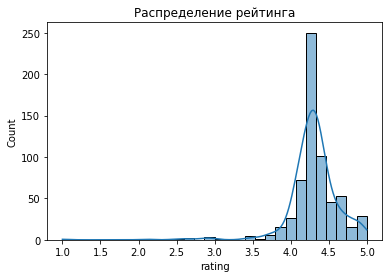

In [82]:
# В столбце рейтинга пропусков не присутствовало, поэтому ранее рассчитанное значение среднего рейтинга 4.3 является истинным
sns.histplot(data=df_cleaned[(df_cleaned['category'] == 'пиццерия')], x='rating', bins=30, kde=True)
plt.title('Распределение рейтинга')

plt.show()

Абсолютное большинство значений находится в районе среднего значения 4.3, также имеется небольшое количество выбросов в виде низких оценок.

---

#### Изучим распределение сетевых и несетевых пиццерий в зависимости от округа Москвы.

chain,0,1
district,,
восточный административный округ,33,38
западный административный округ,33,38
северный административный округ,36,40
северо-восточный административный округ,30,36
северо-западный административный округ,18,22
центральный административный округ,64,48
юго-восточный административный округ,26,29
юго-западный административный округ,26,38
южный административный округ,32,41


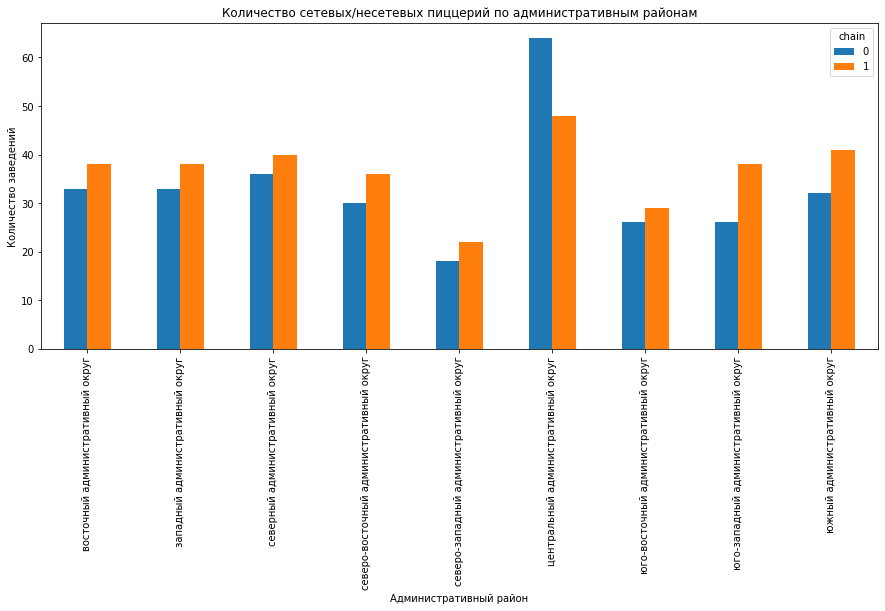

In [83]:
df_pizza_district = df_cleaned[df_cleaned['category'] == 'пиццерия'].groupby('district')['chain'].value_counts().unstack(fill_value=0)
display(df_pizza_district)

df_pizza_district.plot(kind='bar',
title='Количество сетевых/несетевых пиццерий по административным районам',
legend=True,
ylabel='Количество заведений',
xlabel='Административный район',
rot=90,
figsize = (15, 6))

plt.show()

In [84]:
display(round(df_cleaned[df_cleaned['category'] == 'пиццерия'].groupby('district')['chain'].mean(),2))

district
восточный административный округ           0.54
западный административный округ            0.54
северный административный округ            0.53
северо-восточный административный округ    0.55
северо-западный административный округ     0.55
центральный административный округ         0.43
юго-восточный административный округ       0.53
юго-западный административный округ        0.59
южный административный округ               0.56
Name: chain, dtype: float64

Практически во всех районах большее количество пиццерий являются сетевыми (**в среднем 54%**), исключение составляет `Центральный административный округ`, в котором сетевых заведений меньше, их доля составляет **43%**.

В абсолютных значений больше всего заведений обоих типов находится в `Центральном административном округе`. Сетевых заведений там около 50, а несетевых больше 60.

Меньше всего пиццерий в `Северо-Западном административном округе`. Сетевых заведений там чуть больше 20, а несетевых чуть меньше 20.

---

#### Рассмотрим другие взаимосвязи

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable category for analysis 1. Dropping this column
  warnings.warn(


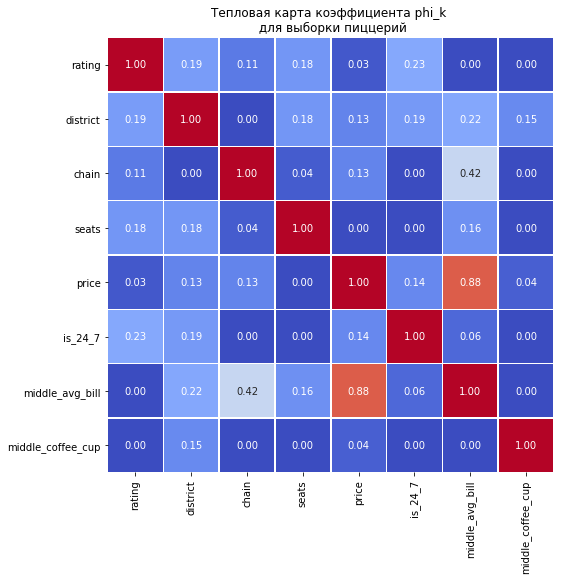

In [85]:
# Проверим какие переменные взаимосвязаны в выборке пиццерий
correlation_pizza = df_cleaned[df_cleaned['category'] == 'пиццерия'][['rating', 'category', 'district', 'chain', 'seats',
                              'price', 'is_24_7', 'middle_avg_bill', 'middle_coffee_cup']].phik_matrix()
plt.figure(figsize=(8, 8))

sns.heatmap(correlation_pizza,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False)

plt.title('Тепловая карта коэффициента phi_k \n для выборки пиццерий')

plt.show()

Можно заметить, что средний чек `middle_avg_bill` в выборке пиццерий имеет довольно высокую взаимосвязь с переменной `chain`. Рассмотрим эту связь более детально.

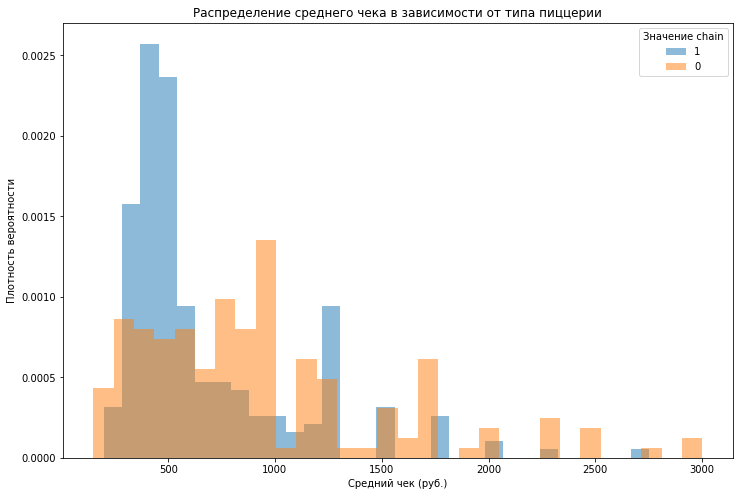

In [86]:
df_pizza_chain_price = df_cleaned[(df_cleaned['category'] == 'пиццерия') & (df_cleaned['middle_avg_bill'] != -1)]

# Строим гистограммы для каждого значения chain
plt.figure(figsize=(12, 8))

for i in df_pizza_chain_price['chain'].unique():
    df_pizza_chain_price.loc[df_pizza_chain_price['chain'] == i, 'middle_avg_bill'].plot(
        kind='hist',
        density=True,
        bins=30,
        alpha=0.5,
        label=f'{i}',
        legend=True)

plt.title('Распределение среднего чека в зависимости от типа пиццерии')
plt.xlabel('Средний чек (руб.)')
plt.ylabel('Плотность вероятности')
plt.legend(title='Значение chain')
plt.show()

In [87]:
# Выведем количество наблюдений и средний чек для сетевых и несетевых пиццерий
display(df_pizza_chain_price.groupby('chain').agg({'id': 'count', 'middle_avg_bill': 'mean'}))

,id,middle_avg_bill
chain,,
0,171,942.532164
1,224,672.459821


Средний чек в несетевых пиццериях на порядок выше, чем в сетевых (**942 руб.** и **672 руб.** соответственно). 

Распределение показывает, что большинство значений для **сетевых пиццерий** находится в районе **500 рублей**, график смещен влево с наличием небольшого количества аномально больших значений. 

Средний чек для **несетевых заведений** не имеет структуру, похожую на нормальное распределение. Большинство значений лежат **в диапазоне от 300 до 1 000 рублей**, оснавная часть этого диапазона расположена ближе к **1 000 рублей.** Также стоит отметить, что для несетевых заведений свойствено большее наличие аномально больших выбросов, что может говорить о том, что в таких заведениях могут присутствовать фирминные дорогостоящие блюда.

---

### Промежуточный вывод


Во-первых, стоит отметить, что большинство пиццерий находится в `Центральном административном округе`, поэтому чтобы уверенно войти на рынок, возможно стоить попробовать открыть пиццерию в других районах. Хорошим вариантом может стать `Северо-Западный административный округ` с 40 пиццериями.

Во-вторых, чуть больше половины пиццерий являются сетевыми заведениями, и везде, кроме `Центрального административного округа`, их количество больше, чем количество несетевых пиццерий. **Средний чек** по всем пиццериям в выборке составил **503 рубля**. Если же рассматривать в контексте типа заведения, то в **сетевых** - средний чек составил **672 рубля**, а в **несетевых** - **942 рубля**.

Таким образом, новичку в отрасли можно попробовать приобрести франшизу сетевого заведения в районах с наименьшим количеством пиццерий, тогда на старте он будет обеспечен потоком клиентов, но за более низкую цену. Либо можно попробовать открыть собственное заведение с авторскими пиццами за среднюю цену в отрасли несетевых пиццерий в тех районах, где преобладает количество сетевых заведений, например `Юго-Западный` и `Южный` административные округа.

## 5. Итоговый вывод и рекомендации


**1. Общий обзор работы**
В ходе проведенного исследования были проанализированы 8 406 заведений общественного питания Москвы. Информация включала в себя название заведения, его месторасположение, категорию, рейтинг, часы работы, средний чек, количество посадочных мест и отношение к сетевому/несетевому типу.

**На первом этапе работы** удалось провести предобработку данных. 
- **Было удалено 531 наблюдение**, что составляет примерно **6% от изначальной выборки**. Решение об удалении было принято на основании наличия критических пропусков, а таке наличия дубликатов.
- Также **пропуски** в некоторых столбцах были заменены на **значение-индикатор -1** для числовых столбцов и на **значение-индикатор no_info** для строковых столбцов.
- В завершение была создана новая **булевая переменная `is_24_7`**, которая принимает значение `True` при значении переменной `hours` равной `ежедневно, круглосуточно`.

**На втором этапе работы** был проведен исследовательский анализ данных, который включал в себя анализ всех данных, зависимость переменных друг от друга, а также детальный анализ рынка пиццерий. Все рассчеты были подкрепленны соответствующими графиками и выводами.

**2. Ответы на исследовательские вопросы**

- **Основной анализ данных**
   - Основу данных представляют заведения в категориях `ресторан` `кафе` и `кофейня`, большинство которых сосредоточено в `Центральном административном округе` (количество заведений **превышает 2 000**). В `Северо-Западном административном округе` наименьшее количество заведений - **около 400**. В остальных районах насчитывается около **700-800 заведений**;
   - В выборке преобладают несетевые заведения: около **4 900 несетевых и 3 000 - сетевых**. В большинстве случаев в различных категориях преобладают несетевые заведения, исключениями являются `булочная`, `пиццерия` и `кофейня`;
   - В данных количества сидячих мест имеется много аномально больших выбросов, которые можно трактовать как места для банкетных мероприятий. Убрав аномальные данные, можно отметить, что **медианное значение количества посадочных мест** для заведений находится на уровне **63**;
   - Распределение **рейтинга** среди заведений близко к **4.3 баллам**, низких рейтингов не так много по отношению к высоким;
   - Связь переменных  `rating` и `price` показала, что с увеличением ценовой категории, увиличивается и рейтинг заведения, хоть и незначительно:
   - Самая популярная сеть со 120 заведениями - это `Шоколадница`. Выделяя ТОП-15 заведений по популярности, можно отметить, что наибольшее количество заведений представлено в категории `кофейня`. После идут категории `ресторан`, `пиццерия` и `кафе`;
   - В данных среднего чека заведений присутствуют аномально большие значения, которые можно объяснить наличием уникальных дорогостоящих блюд. Без их учета **среднее значение чека по всем округам находится в районе 800 руб.** Самыми большими средними значениями отличаются `Центральный` и `Западный` районы. Их значения **больше 1 000 руб.**;
   - В датафрейме преобладают не круглосуточные заведения. В разрезе категорий **самая большая доля круглосуточных заведений составила около 25%** для категории `быстрое питание`. В абсолютных значениях это **150 заведений**. В остальных категориях доля в среднем составляет **от 5% до 10%**.
   
   
- **Детальное исследование пиццерий**
   - В данных находится информация о **628** пиццериях, из которых **112** - в `Центральном административном округе` (примерно **5%** от общего количества). Для остальных районов в среднем доля пиццерий составляет **10%**;
   - Средний рейтинг пиццерий - **4.3 балла**, **52%** - являются сетевыми заведениями и лишь **5%** работают круглосуточно. Средний чек составляет **503 рубля**, а средняя цена чашки кофе - **153 рублля**, хотя заведений с информацией о цене чашки кофе всего 3.
   - Только в `Центральном административном округе` несетевых заведений больше, чем сетевых. В остальных районах доля сетевых заведений чуть **превышает 50%**. Стоит также отметить, что средний чек в несетевых пиццериях превышает средний чек в сетевых на **270 рублей**.

**3. Рекомендации на основе анализа данных.**
При открытии заведения стоит задуматься о таких категориях, как `ресторан`, `кафе` и `кофейня`, они полузуются популярностью как в отдаленных районах так и в Центальном округе. 

Важно уделять внимание рейтингу заведения, в долгосрочной переспективе это позволит увеличивать цены без потери клиентов. Самыми большими ценами выделяются `Центральный` и `Западный` районы. И, если `Центральный` район может быть переполнен конкурентами, то количество заведений в `Западном` районе значительно меньше, что более благоприятно для открытия нового заведения.

Говоря о пиццериях, можно отметить, что на этом рынке преобладают сетевые точки, но несмотря на это средний чек в несетевых заведениях значительно выше, что потенциально может положительно влиять на открытие собственной пиццерии.

В качестве рекомендаций для дальнейшего исследования стоит отметить, что в данных присутствует очень много пропусков в ценовых значениях, которые очень важны для анализа рынков. Поэтому опимальнее всего - качественно заполнить эти пропуска и проследить какие факторы влияют на увеличение цен заведения.